In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Enabling the GPU usage for tensorflow

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
print('Amount of GPUs :', len(gpu_devices))
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Amount of GPUs : 1


## Importing the dataset
To import the dataset, we need to follow along with the relative folder path. <br>

In [3]:
# Importing dataset
dataset = pd.read_csv('datasets/cicids2017/CICIDS2017_sample1.csv')
pd.set_option("display.max_columns", None)

## Data Analyzing

In [4]:
print('Dimension: ', dataset.shape)
dataset.head(3)

Dimension:  (56661, 78)


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,0,0.000000,0.000000,9.250000e+06,500000.000000,4.000000,0.000000,4,4,4,4.000000,0.000000,4,4,0,0.000000,0.000000,0,0,1,0,0,0,40,0,500000.000000,0.000000,6,31,22.666667,14.433757,2.083333e+02,0,1,0,0,1,0,0,0,0,34.000000,18.500000,0.000000,40,0,0,0,0,0,0,2,37,0,0,60,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,0,1707.338710,846.172655,7.527901e+05,758.549485,1330.626168,5048.982697,23198,0,142377,3163.933333,7552.916858,23792,0,119204,1954.163934,6058.842404,23865,4,0,0,0,0,1168,1992,323.085892,435.463593,0,4344,983.302752,1052.392050,1.107529e+06,0,0,0,1,0,0,0,0,1,992.407407,28.804348,1707.338710,1168,0,0,0,0,0,0,46,1325,62,105855,29200,61,30,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,0,1608.035714,902.027366,3.885996e+05,429.029300,2377.460000,6838.420713,23435,3,118873,5403.318182,9768.511157,24311,49,95541,3538.555556,8193.060024,24168,3,0,0,0,0,744,904,193.483802,235.545498,0,2896,888.346154,1028.323762,1.057450e+06,0,0,0,1,0,0,0,0,1,905.764706,50.826087,1608.035714,744,0,0,0,0,0,0,23,1169,28,45025,29200,61,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [33]:
dataset.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.666100e+04,56661.000000,56661.000000,5.666100e+04,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,5.660700e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,56661.000000,56661.0,56661.000000,56661.0,56661.000000,56661.000000,5.666100e+04,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.0,56661.0,56661.0,56661.0,56661.0,56661.0,56661.000000,5.666100e+04,56661.000000,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04
mean,1.940740e+07,5.893348,5.441168,7.325051e+02,5.282417e+03,166.369390,10.105946,43.155072,57.334013,1552.609749,21.466511,507.738499,643.932383,9.272585e+05,7.773659e+04,1.842567e+06,4.856262e+06,1.600990e+07,1.819959e+05,1.911531e+07,3.509423e+06,6.331219e+06,1.590385e+07,6.529407e+05,8.670503e+06,1.593282e+06,2.159899e+06,5.712081e+06,5.385429e+05,0.038545,0.0,0.000018,0.0,160.072996,145.755952,6.949791e+04,8.238682e+03,8.711618,1605.009107,256.023514,504.482849,1.035010e+06,0.058947,0.038545,0.000141,0.399711,0.365437,0.073207,0.000018,0.000141,0.633028,282.420761,43.155072,507.738499,160.072996,0.0,0.0,0.0,0.0,0.0,0.0,5.893348,7.325051e+02,5.441168,5.281813e+03,8039.309878,2001.582729,3.115794,26.955966,8.127717e+04,2.732128e+04,1.207459e+05,6.484220e+04,1.474432e+07,8.688159e+05,1.539940e+07,1.410650e+07
std,3.672377e+07,56.898685,66.513164,2.135208e+04,1.092694e+05,669.066176,47.856017,174.087067,224.747519,2773.907899,53.439210,848.013349,1219.054142,2.109625e+07,2.700770e+05,4.802227e+06,9.923342e+06,3.288005e+07,3.310681e+06,3.671304e+07,8.941486e+06,1.351671e+07,3.293506e+07,6.896974e+06,2.657513e+07,7.362523e+06,8.430643e+06,2.067986e+07,6.124201e+06,0.192510,0.0,0.004201,0.0,1217.336252,1356.452262,2.635206e+05,3.975432e+04,19.751536,2818.290579,407.684973,883.514175,2.400672e+06,0.235528,0.192510,0.011882,0.489843,0.481557,0.260479,0.004201,0.011882,0.626266,447.404710,174.087067,848.013349,1217.336252,0.0,0.0,0.0,0.0,0.0,0.0,56.898685,2.135208e+04,66.513164,1.091506e+05,13380.606895,7771.647253,53.236039,6.796834,7.396278e+05,3.340568e+05,9.387816e+05,6.835563e+05,3.214172e+07,6.311718e+06,3.301473e+07,3.191101e+07
min,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0000

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56661 entries, 0 to 56660
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                56661 non-null  int64  
 1   Total Fwd Packets            56661 non-null  int64  
 2   Total Backward Packets       56661 non-null  int64  
 3   Total Length of Fwd Packets  56661 non-null  int64  
 4   Total Length of Bwd Packets  56661 non-null  int64  
 5   Fwd Packet Length Max        56661 non-null  int64  
 6   Fwd Packet Length Min        56661 non-null  int64  
 7   Fwd Packet Length Mean       56661 non-null  float64
 8   Fwd Packet Length Std        56661 non-null  float64
 9   Bwd Packet Length Max        56661 non-null  int64  
 10  Bwd Packet Length Min        56661 non-null  int64  
 11  Bwd Packet Length Mean       56661 non-null  float64
 12  Bwd Packet Length Std        56661 non-null  float64
 13  Flow Bytes/s    

## Data Refinement

There is a NaN value in '<b>Flow Bytes/s</b>' and unnecessary value 'inf' are in '<b>Flow Bytes/s</b>' and  '<b>Flow Packets/s</b>'. <br>
'inf' values --> 0 <br>
'NaNs' values --> 0

In [15]:
print('If True, it contains NaNs: '+ str(dataset.isnull().values.any())) # this is checking entire dataframe
print('Total NaN values: '+ str(dataset.isnull().sum().sum()))

If True, it contains NaNs: True
Total NaN values: 54


In [31]:
# located column which contain NaNs 
dataset.loc[:, dataset.isnull().any()].columns

Index(['Flow Bytes/s'], dtype='object')

In [10]:
# change variables (datasets -> dataframe)
dataset['Flow Bytes/s'].fillna(0, inplace = True)
dataset['Flow Packets/s'].fillna(0, inplace = True)

In [11]:
# rechecking NaNs value in datasets
print('If True, it contains NaNs: '+ str(dataset.isnull().values.any()))
dataset.isnull().sum().sum()

If True, it contains NaNs: False


0

In [12]:
print(dataset.shape)
dataset.describe()

(56661, 78)


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.666100e+04,56661.000000,56661.000000,5.666100e+04,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,56661.000000,56661.0,56661.000000,56661.0,56661.000000,56661.000000,5.666100e+04,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.0,56661.0,56661.0,56661.0,56661.0,56661.0,56661.000000,5.666100e+04,56661.000000,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04
mean,1.940740e+07,5.893348,5.441168,7.325051e+02,5.282417e+03,166.369390,10.105946,43.155072,57.334013,1552.609749,21.466511,507.738499,643.932383,9.263748e+05,7.773659e+04,1.842567e+06,4.856262e+06,1.600990e+07,1.819959e+05,1.911531e+07,3.509423e+06,6.331219e+06,1.590385e+07,6.529407e+05,8.670503e+06,1.593282e+06,2.159899e+06,5.712081e+06,5.385429e+05,0.038545,0.0,0.000018,0.0,160.072996,145.755952,6.949791e+04,8.238682e+03,8.711618,1605.009107,256.023514,504.482849,1.035010e+06,0.058947,0.038545,0.000141,0.399711,0.365437,0.073207,0.000018,0.000141,0.633028,282.420761,43.155072,507.738499,160.072996,0.0,0.0,0.0,0.0,0.0,0.0,5.893348,7.325051e+02,5.441168,5.281813e+03,8039.309878,2001.582729,3.115794,26.955966,8.127717e+04,2.732128e+04,1.207459e+05,6.484220e+04,1.474432e+07,8.688159e+05,1.539940e+07,1.410650e+07
std,3.672377e+07,56.898685,66.513164,2.135208e+04,1.092694e+05,669.066176,47.856017,174.087067,224.747519,2773.907899,53.439210,848.013349,1219.054142,2.108622e+07,2.700770e+05,4.802227e+06,9.923342e+06,3.288005e+07,3.310681e+06,3.671304e+07,8.941486e+06,1.351671e+07,3.293506e+07,6.896974e+06,2.657513e+07,7.362523e+06,8.430643e+06,2.067986e+07,6.124201e+06,0.192510,0.0,0.004201,0.0,1217.336252,1356.452262,2.635206e+05,3.975432e+04,19.751536,2818.290579,407.684973,883.514175,2.400672e+06,0.235528,0.192510,0.011882,0.489843,0.481557,0.260479,0.004201,0.011882,0.626266,447.404710,174.087067,848.013349,1217.336252,0.0,0.0,0.0,0.0,0.0,0.0,56.898685,2.135208e+04,66.513164,1.091506e+05,13380.606895,7771.647253,53.236039,6.796834,7.396278e+05,3.340568e+05,9.387816e+05,6.835563e+05,3.214172e+07,6.311718e+06,3.301473e+07,3.191101e+07
min,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0000

### Drop Empty columns

In [13]:
dataset.drop(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
                'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], axis=1, inplace=True)

In [14]:
print(dataset.shape)
dataset.describe()

(56661, 70)


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.666100e+04,56661.000000,56661.000000,5.666100e+04,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,5.666100e+04,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,56661.000000,5.666100e+04,56661.000000,5.666100e+04,56661.000000,56661.000000,56661.000000,56661.000000,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04,5.666100e+04
mean,1.940740e+07,5.893348,5.441168,7.325051e+02,5.282417e+03,166.369390,10.105946,43.155072,57.334013,1552.609749,21.466511,507.738499,643.932383,9.263748e+05,7.773659e+04,1.842567e+06,4.856262e+06,1.600990e+07,1.819959e+05,1.911531e+07,3.509423e+06,6.331219e+06,1.590385e+07,6.529407e+05,8.670503e+06,1.593282e+06,2.159899e+06,5.712081e+06,5.385429e+05,0.038545,0.000018,160.072996,145.755952,6.949791e+04,8.238682e+03,8.711618,1605.009107,256.023514,504.482849,1.035010e+06,0.058947,0.038545,0.000141,0.399711,0.365437,0.073207,0.000018,0.000141,0.633028,282.420761,43.155072,507.738499,160.072996,5.893348,7.325051e+02,5.441168,5.281813e+03,8039.309878,2001.582729,3.115794,26.955966,8.127717e+04,2.732128e+04,1.207459e+05,6.484220e+04,1.474432e+07,8.688159e+05,1.539940e+07,1.410650e+07
std,3.672377e+07,56.898685,66.513164,2.135208e+04,1.092694e+05,669.066176,47.856017,174.087067,224.747519,2773.907899,53.439210,848.013349,1219.054142,2.108622e+07,2.700770e+05,4.802227e+06,9.923342e+06,3.288005e+07,3.310681e+06,3.671304e+07,8.941486e+06,1.351671e+07,3.293506e+07,6.896974e+06,2.657513e+07,7.362523e+06,8.430643e+06,2.067986e+07,6.124201e+06,0.192510,0.004201,1217.336252,1356.452262,2.635206e+05,3.975432e+04,19.751536,2818.290579,407.684973,883.514175,2.400672e+06,0.235528,0.192510,0.011882,0.489843,0.481557,0.260479,0.004201,0.011882,0.626266,447.404710,174.087067,848.013349,1217.336252,56.898685,2.135208e+04,66.513164,1.091506e+05,13380.606895,7771.647253,53.236039,6.796834,7.396278e+05,3.340568e+05,9.387816e+05,6.835563e+05,3.214172e+07,6.311718e+06,3.301473e+07,3.191101e+07
min,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000

## Data pre-processing on both number data and object data.

In [15]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [16]:
# extracting numerical value from dataframe
num_cols = dataset.select_dtypes(include=['float64','int64']).columns

# extracting object value from dataframe
obj_cols = dataset.select_dtypes(include=['object']).copy()

# scaling numeric data 
scaled_num = standard_scaler.fit_transform(dataset.select_dtypes(include=['float64','int64']))

# turn into dataframe
pd_scaled_num= pd.DataFrame(scaled_num, columns=num_cols)


# merging both numeric data and object data
dataset = pd.concat([pd_scaled_num, obj_cols], axis=1)

### Change Label obj to number
Tranforms BENIGN to (<b>0</b>) and other attacks to (<b>1</b>).

In [17]:
dataset.Label.value_counts()

BENIGN        22731
DoS           19035
PortScan       7946
BruteForce     2767
WebAttack      2180
Bot            1966
0iltration       36
Name: Label, dtype: int64

In [18]:
# map the label data
map_label = {'BENIGN' : 0,'DoS' : 1,'PortScan':1,'BruteForce':1,'WebAttack':1,'Bot':1,'0iltration':1}
dataset['Label'] = dataset['Label'].apply(lambda v: map_label[v])

In [19]:
print('Unique Label data: ', dataset['Label'].unique())
print(dataset.shape)
dataset.head(5)

Unique Label data:  [0 1]
(56661, 70)


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.528474,-0.068427,-0.081807,-0.032573,-0.048344,-0.202328,-0.085799,-0.141626,-0.176450,-0.559724,-0.401703,-0.598744,-0.528228,0.394746,1.563506,-0.383693,-0.489382,-0.486923,-0.054972,-0.520673,-0.392491,-0.468403,-0.482889,-0.094671,-0.326267,-0.216406,-0.256198,-0.276217,-0.087938,4.994365,-0.004201,-0.098637,-0.107455,1.633671,-0.207242,-0.137288,-0.558503,-0.572400,-0.554664,-0.431050,-0.250279,4.994365,-0.011883,-0.816004,1.317745,-0.281052,-0.004201,-0.011883,-1.010807,-0.555253,-0.141626,-0.598744,-0.098637,-0.068427,-0.032573,-0.081807,-0.048391,-0.596339,-0.257680,-0.039744,-1.023422,-0.10989,-0.081787,-0.128621,-0.094861,-0.458733,-0.137652,-0.466444,-0.442061,0
1,-0.524597,0.704885,0.850348,0.027749,0.920418,0.603280,-0.211176,-0.082435,0.240598,1.006311,-0.401703,1.414613,0.165901,-0.008232,-0.285025,-0.383416,-0.488873,-0.486217,-0.054973,-0.516795,-0.392137,-0.467845,-0.482167,-0.094671,-0.321781,-0.216141,-0.255480,-0.275063,-0.087937,-0.200226,-0.004201,0.827985,1.361095,-0.262505,-0.196288,-0.441064,0.971871,1.783940,0.620153,0.030208,-0.250279,-0.200226,-0.011883,1.225484,-0.758872,-0.281052,-0.004201,-0.011883,0.585974,1.586914,-0.082435,1.414613,0.827985,0.704885,0.027749,0.850348,0.921425,1.581459,-0.249703,0.505005,-1.023422,-0.10989,-0.081787,-0.128621,-0.094861,-0.458733,-0.137652,-0.466444,-0.442061,0
2,-0.525237,0.300654,0.339166,0.020443,0.363715,0.603280,-0.211176,0.044065,0.439623,0.484299,-0.401703,1.297511,0.211719,-0.025504,-0.286245,-0.383198,-0.488693,-0.486210,-0.054972,-0.517435,-0.391887,-0.467681,-0.482151,-0.094664,-0.322672,-0.215926,-0.255227,-0.275048,-0.087937,-0.200226,-0.004201,0.479680,0.558996,-0.262997,-0.201317,-0.441064,0.458080,1.551022,0.592911,0.009348,-0.250279,-0.200226,-0.011883,1.225484,-0.758872,-0.281052,-0.004201,-0.011883,0.585974,1.393256,0.044065,1.297511,0.479680,0.300654,0.020443,0.339166,0.364117,1.581459,-0.249703,0.016609,0.742122,-0.10989,-0.081787,-0.128621,-0.094861,-0.458733,-0.137652,-0.466444,-0.442061,0
3,-0.524565,0.652159,0.745105,0.026625,0.933542,0.603280,-0.211176,-0.074097,0.257380,1.006311,-0.401703,1.701604,0.233214,-0.008065,-0.285306,-0.383385,-0.488846,-0.486216,-0.054972,-0.516763,-0.392109,-0.467823,-0.482166,-0.094671,-0.321738,-0.216104,-0.255434,-0.275062,-0.087937,-0.200226,-0.004201,0.788554,1.195957,-0.262594,-0.197606,-0.441064,0.971871,2.062506,0.768735,0.152481,-0.250279,-0.200226,-0.011883,1.225484,-0.758872,-0.281052,-0.004201,-0.011883,0.585974,1.845416,-0.074097,1.701604,0.788554,0.652159,0.026625,0.745105,0.934563,1.581459,-0.249703,0.429867,-1.023422,-0.10989,-0.081787,-0.128621,-0.094861,-0.458733,-0.137652,-0.466444,-0.442061,0
4,-0.524560,0.757610,0.805244,0.028030,0.960045,0.603280,-0.211176,-0.091862,0.225736,1.006311,-0.401703,1.603531,0.233732,-0.007141,-0.285052,-0.383414,-0.488867,-0

## Displaying SNS Heatmap Correlation

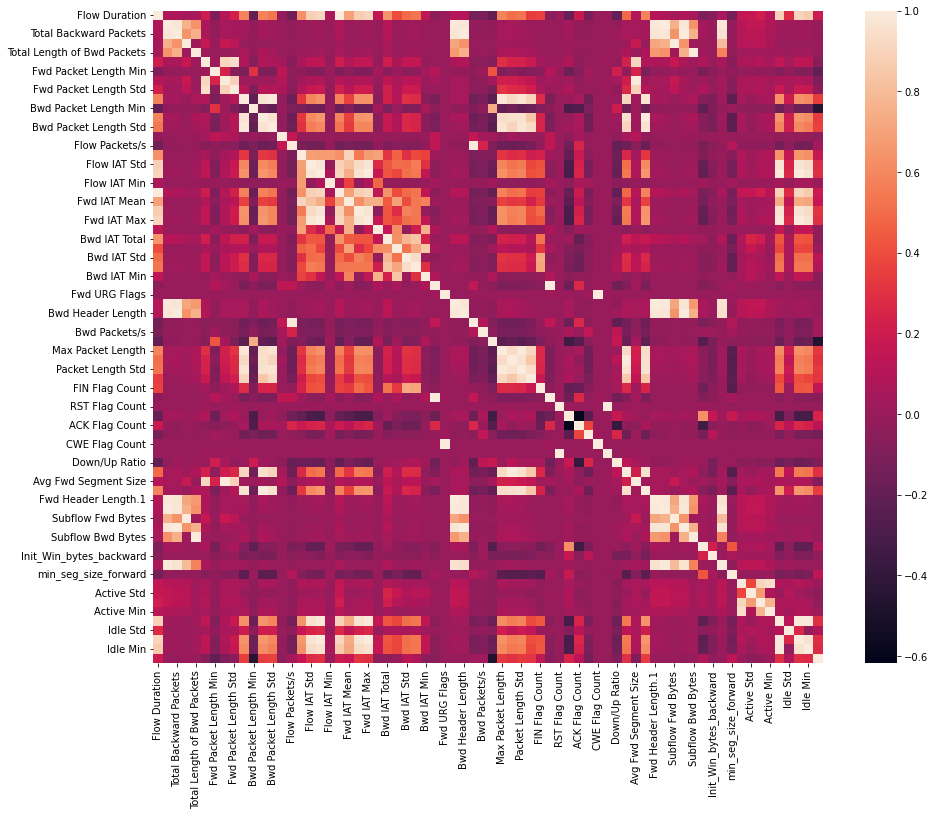

In [20]:
# correlation
corr = dataset.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

## Using Machine Learning Method

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Y = dataset[['Label']]
X = dataset.drop(['Label'], axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state =42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(37962, 69) (37962, 1)
(18699, 69) (18699, 1)


In [23]:
# Gaussian Naive Bayes
import time
from sklearn.naive_bayes import GaussianNB
GNbayes = GaussianNB()

In [24]:
start_time = time.time()
GNbayes.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Fiting time: ",end_time-start_time)

Fiting time:  0.06482648849487305


In [25]:
start_time = time.time()
prediction2 = GNbayes.predict(X_test)
end_time = time.time()
print("Prediction time: ",end_time-start_time)

Prediction time:  0.03191351890563965


In [26]:
# train score
score = (GNbayes.score(X_train, Y_train))*100
final1 = '{0:.4g}'.format(score)
# test score
score = (GNbayes.score(X_test,Y_test))*100
final2 = '{0:.4g}'.format(score)

In [27]:
print("Train score is:", final1, '%')
print("Test score is:", final2, '%')

Train score is: 71.96 %
Test score is: 72.17 %


## Using Multi-perceptron Layer Neural Network

In [28]:
# building neural network
keras.backend.clear_session()
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(Y_train.shape[1],activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'],  optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                700       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 4,323
Trainable params: 4,323
Non-trainable params: 0
______________________________________________________

In [29]:
# auto stopping training when it reach its limit
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)

In [30]:
# model training
training = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), callbacks=[monitor], verbose = 2, epochs=1000)

Epoch 1/1000
1187/1187 - 6s - loss: 0.3578 - accuracy: 0.8600 - val_loss: 0.2214 - val_accuracy: 0.9156
Epoch 2/1000
1187/1187 - 5s - loss: 0.1841 - accuracy: 0.9288 - val_loss: 0.1734 - val_accuracy: 0.9411
Epoch 3/1000
1187/1187 - 4s - loss: 0.1542 - accuracy: 0.9376 - val_loss: 0.1487 - val_accuracy: 0.9335
Epoch 4/1000
1187/1187 - 4s - loss: 0.1460 - accuracy: 0.9413 - val_loss: 0.1358 - val_accuracy: 0.9463
Epoch 5/1000
1187/1187 - 4s - loss: 0.1367 - accuracy: 0.9436 - val_loss: 0.1267 - val_accuracy: 0.9505
Epoch 6/1000
1187/1187 - 4s - loss: 0.1313 - accuracy: 0.9479 - val_loss: 0.1221 - val_accuracy: 0.9514
Epoch 7/1000
1187/1187 - 4s - loss: 0.1265 - accuracy: 0.9486 - val_loss: 0.1292 - val_accuracy: 0.9533
Epoch 8/1000
1187/1187 - 4s - loss: 0.1222 - accuracy: 0.9503 - val_loss: 0.1240 - val_accuracy: 0.9542
Epoch 9/1000
1187/1187 - 4s - loss: 0.1196 - accuracy: 0.9502 - val_loss: 0.1129 - val_accuracy: 0.9579
Epoch 10/1000
1187/1187 - 4s - loss: 0.1147 - accuracy: 0.9523 -

In [31]:
# Validation score on test data
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print(f"Validation score: {score}")

Validation score: 1.0
